# Intro to Data Preprocessing
Data preprocessing can refer to manipulation or preparation of data for inputting into models.

![basic](assets\01.png)

Common Problems we deal with in data wrangling:
- Missing Data
- Inconsistent Data
- Outlier Data
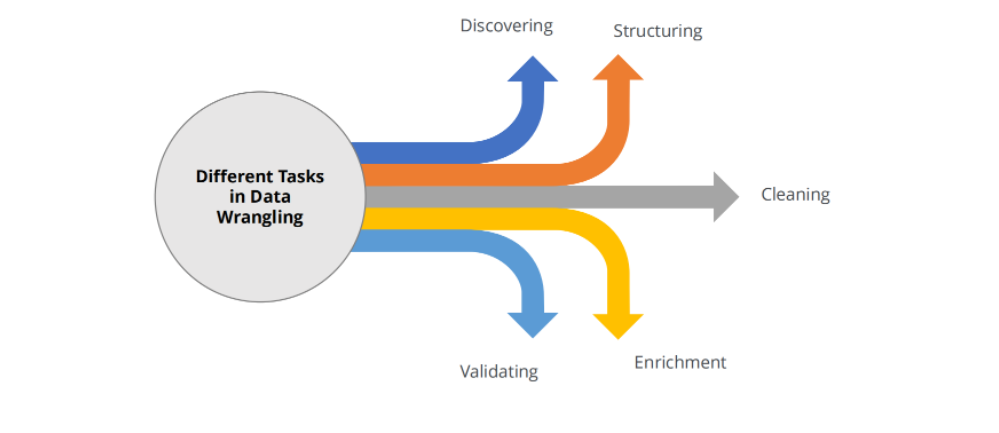

In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

np.random.seed(19)

# Pandas Basics

Data set used here is the BigMart Sales Dataset


In [2]:
#Loading data
data = pd.read_csv("archive/train.csv")
data.head() #By default gives only 5 entries, Has a max limit of 50, accepts parameter upto 50
#data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data can be view as

In [3]:
data.shape #8523,12
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Indexing
Pandas offers two ways to index data
- [] - bracket indexing
- .loc - label based indexing
- .iloc - integer based indexing

### Bracket Indexing
[] - Single Brackets return a Series Pandas Object<br>
[[]] - Returns a Dataframe object

In [4]:
ipd.display(data['Item_Weight']) # returns a series
ipd.display(data[['Item_Type']]) # returns the dataframe

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

,Item_Type
0,Dairy
1,Soft Drinks
2,Meat
3,Fruits and Vegetables
4,Household
...,...
8518,Snack Foods
8519,Baking Goods
8520,Health and Hygiene
8521,Snack Foods


### loc
- loc interprets values provided as labels(strings).<br> 
- Its often used for conditional indexing
- It includes last index

In [5]:
ipd.display(data.loc[2:8]) # Reads this as a label, since our index is numeric lookss same as iloc 
ipd.display(data.loc[data['Item_Weight']>20]) # loc allows us conditionals
ipd.display(data.loc[(data['Item_Fat_Content'].str.contains('Regular')) & ( data['Item_Weight']>20)] )


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
89,FDN27,20.85,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
90,FDW20,20.75,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.25,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
129,NCP30,20.50,Low Fat,0.032835,Household,40.2822,OUT045,2002,NaN,Tier 2,Supermarket Type1,707.0796
...,...,...,...,...,...,...,...,...,...,...,...,...
8500,NCQ42,20.35,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170
8503,FDQ44,20.50,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8512,FDR26,20.70,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.70,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
122,FDB14,20.25,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
288,FDB57,20.25,Regular,0.018802,Fruits and Vegetables,222.1772,OUT035,2004,Small,Tier 2,Supermarket Type1,5559.4300
310,FDD40,20.25,Regular,0.014791,Dairy,193.6162,OUT035,2004,Small,Tier 2,Supermarket Type1,3848.3240
350,FDP59,20.85,Regular,0.056696,Breads,104.0648,OUT018,2009,Medium,Tier 3,Supermarket Type2,1869.5664
368,FDL51,20.70,Regular,0.047685,Dairy,212.5876,OUT018,2009,Medium,Tier 3,Supermarket Type2,1286.3256
...,...,...,...,...,...,...,...,...,...,...,...,...
7928,FDV20,20.20,Regular,0.060045,Fruits and Vegetables,128.3678,OUT018,2009,Medium,Tier 3,Supermarket Type2,1398.8458
7960,FDP31,21.10,Regular,0.161505,Fruits and Vegetables,65.0168,OUT046,1997,Small,Tier 1,Supermarket Type1,639.1680
8105,FDH53,20.50,Regular,0.000000,Frozen Foods,83.2592,OUT017,2007,NaN,Tier 2,Supermarket Type1,1155.8288
8184,FDF40,20.25,Regular,0.022508,Dairy,248.1092,OUT035,2004,Small,Tier 2,Supermarket Type1,4731.1748


### iloc
- In pandas we use a method iloc which stands for integer locate<br>
- It views all input as integer indices <br>
- in contrast to loc it doesn't include last index

In [6]:
ipd.display(data.iloc[2:8])
ipd.display(data.iloc[2:8, 2:5])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


,Item_Fat_Content,Item_Visibility,Item_Type
2,Low Fat,0.016760,Meat
3,Regular,0.000000,Fruits and Vegetables
4,Low Fat,0.000000,Household
5,Regular,0.000000,Baking Goods
6,Regular,0.012741,Snack Foods
7,Low Fat,0.127470,Snack Foods


In [7]:
# ipd.display(data.loc[2:8, 2:4]) Notice how this gives an error
ipd.display(data.loc[2:8, 'Item_Fat_Content': 'Item_Type']) # Gives us the same output as above

,Item_Fat_Content,Item_Visibility,Item_Type
2,Low Fat,0.016760,Meat
3,Regular,0.000000,Fruits and Vegetables
4,Low Fat,0.000000,Household
5,Regular,0.000000,Baking Goods
6,Regular,0.012741,Snack Foods
7,Low Fat,0.127470,Snack Foods
8,Regular,0.016687,Frozen Foods


### Data.info()
Gives us the data types of each columns

In [8]:
# data.columns
data.info() #Notice how Item_weight and Outlet_size have less values than total no of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Scales
Refers to types of data uses in data wrangling(not numpy data types!)

There are 4 main:
1. **Nominal**
2. **Ordinal**
3. **Interval**
4. **Ratio**

Below is an image to give a brief idea

![image.png](assets\02.jpg)
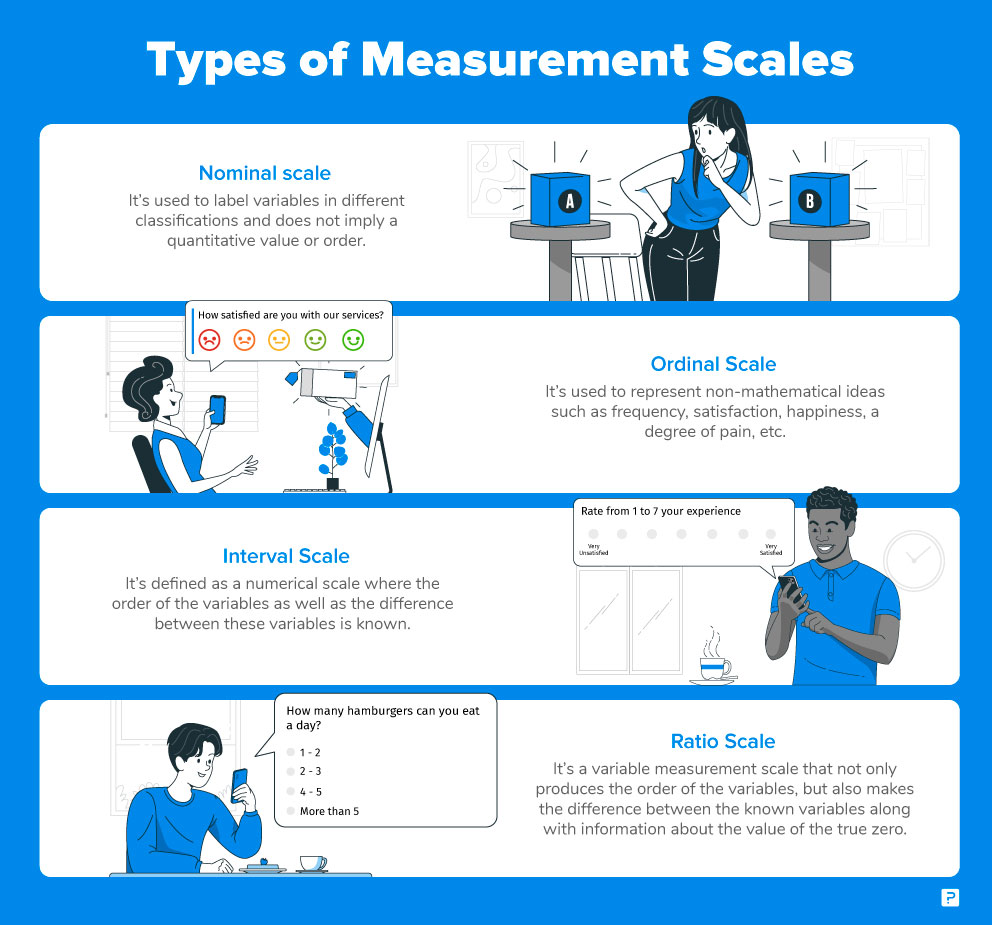

## Exploring Data
Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more

### .unique()
return a list of unique values in a given Series

### .value_counts()
returns a Series of count of each value in a given Series

In [9]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
data["Item_Type"].value_counts()
# ipd.display(data["Item_Type"].count())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Inconsistent Data
Checking the same for Item Fat Content

In [11]:
data["Item_Fat_Content"].unique() 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### We see that there are repetitions, on checking the count we see they seem to refer to the same thing

In [12]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

To deal with missing values we could replace each manually or we could python in-built string processing library by:
1. Converting all variables to lower-case, this takes care of capitalization inconsistencies
2. Converting all alternate labels to a singular label, lf and ref to low fat and regular

In [13]:
dat_copy = data.copy() # Making a shallow copy to avoid any conversion issues
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].str.lower()
ipd.display(dat_copy["Item_Fat_Content"].unique())


# dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace("lf","low fat")
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace({"lf":"low fat", "reg": "regular"})
dat_copy["Item_Fat_Content"].unique()

# dat_copy["Item_Fat_Content"].value_counts()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

array(['low fat', 'regular'], dtype=object)

In [14]:
data = dat_copy
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Missing Values
Missing values in datasets are often represented by NaN or None. It usually requires to cleaned before being fed into a model.
But before we get into missing values, here's a small revision:

1. The mean is the average of a data set.
2. The mode is the most common number in a data set.
3. The median is the middle of the set of numbers.


![image.png](assets\03.png)
<!-- 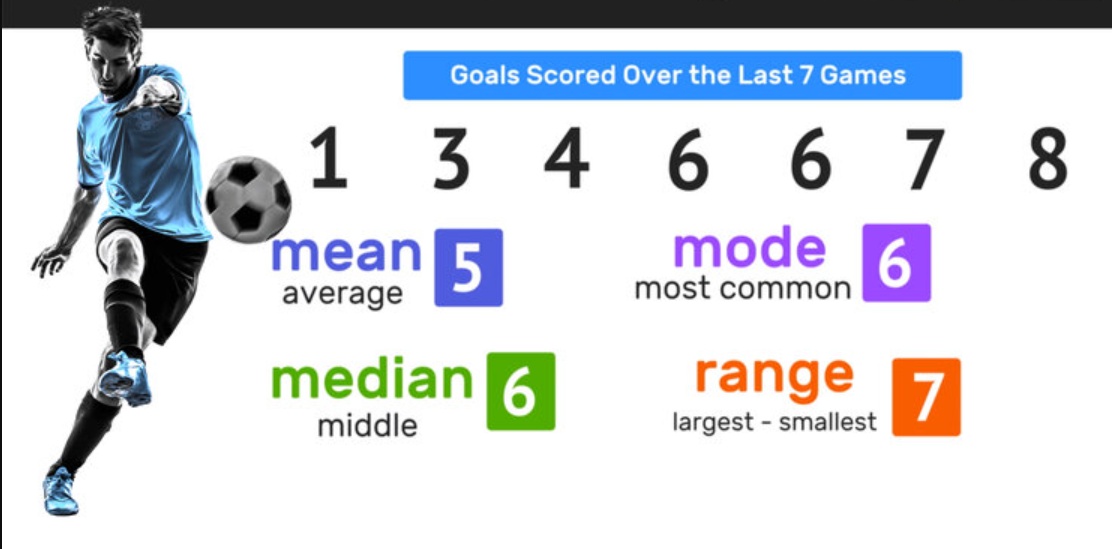 -->
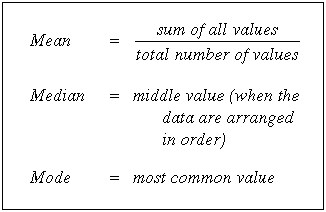

**How to deal with missing data?**

1.  drop data  
    a. drop the whole row  
    b. drop the whole column
    
2.  replace data  
    a. replace it by mean  
    b. replace it by frequency  
    c. replace it based on other functions

In [15]:
data["Outlet_Size"].unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

Missing data can also be found by isnull() or isna() functions.

In [16]:
ipd.display(data.isnull().any())

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

sum() function with isnull() can provide the summation of all our null values

In [17]:
missing_vals = data.isnull().sum()
ipd.display(missing_vals)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
total_cells = np.product(data.shape[0])
# figuring out amt of missing values
outlet_missing = missing_vals['Outlet_Size']

# percent of data that is missing
percent_missing = (outlet_missing/total_cells) * 100
ipd.display("Outlets Missing: "+str(percent_missing))

weight_missing = missing_vals['Item_Weight']

# percent of data that is missing
percent_missing = (weight_missing/total_cells) * 100
ipd.display("Items missing " + str(percent_missing))

'Outlets Missing: 28.27642848762173'

'Items missing 17.165317376510618'

We can figure which of our rows are missing their Item Weights by the following

In [19]:
data[data['Item_Weight'].isnull()] #1462 columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


#### As Item_Weight is a Ratio (continious) variable we replace it by it's mean

In [20]:
# Replace Outlet by mode
# Replace Item_weight by mean

avg_item_wt = data["Item_Weight"].astype("float").mean()

data_cpy = data.copy()
data_cpy["Item_Weight"].replace(np.nan, avg_item_wt, inplace=True)
data_cpy["Item_Weight"].isnull().any() 
#Maybe assert

False

In [21]:
data = data_cpy

#### As Outlet_Size is a Ordinal Value we can replace it by it's Mode

In [22]:
data_cpy = data.copy()

ipd.display(data_cpy["Outlet_Size"].value_counts())
outlet_mode = data_cpy["Outlet_Size"].mode()
data_cpy["Outlet_Size"].replace(np.nan, outlet_mode[0], inplace=True)

data_cpy["Outlet_Size"].isnull().any()
# data_cpy["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

False

In [23]:
data = data_cpy
ipd.display(data.isnull().any())

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [24]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Outliers
Outliers skew the data when trying to average the dataset.

In [25]:
data.mean()
# data.median()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64


Outliers: the value that is considerably higher or lower from rest of the data

-   Lets say value at 75% is Q3 and value at 25% is Q1.
-   Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR  
    We will use describe() method. Describe method includes:
-   count: number of entries
-   mean: average of entries
-   std: standart deviation
-   min: minimum entry
-   25%: first quantile
-   50%: median or second quantile
-   75%: third quantile
-   max: maximum entry

 

In [26]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Boxplots 
Boxplots are a very useful tool to understand the spread and skewness of data through understanding their quartiles

<AxesSubplot:>

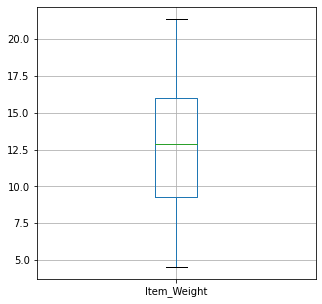

In [27]:
data.boxplot(column="Item_Weight", figsize=(5,5))

The green line in center represents the Median or 2nd Quantile or Q2<br>
The low end of the box represents the 1st Quantile or Q1<br>
the upper end of the box represents the 3rd Quantile or Q3<br>
The IQR is calculated as Q3 - Q1
The tail and head(caps) of the plot are represented as the min and max values present in the sequence

What is quantile?

-   1,4,5,6,8,9,11,12,13,14,15,16,17
-   The median is the number that is in  **middle**  of the sequence. In this case it would be 11.
    
-   The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
    
-   The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.


We can manually calculate them as follows:

In [28]:
Q2 = data["Item_Weight"].median()  #Normal Median
# median = data["Item_Weight"].sort_values()[int(0.5*len(data))] Gives float so needs to be prev+next/2
Q1 = data["Item_Weight"].sort_values()[:int(0.5*len(data))].median()
Q3 = data["Item_Weight"].sort_values()[int(0.5*len(data)):].median()
IQR = Q3-Q1

ipd.display("2nd Quartile " + str(Q2))
ipd.display("1nd Quartile " + str(Q1))
ipd.display("3nd Quartile " + str(Q3))
ipd.display("IQR " + str(IQR))


# Can be verified with data["Item_Weight"].quartile(0.25)

'2nd Quartile 12.857645184135976'

'1nd Quartile 9.31'

'3nd Quartile 16.0'

'IQR 6.6899999999999995'

*The values can also be manually confirmed by looking at the table generated by the .describe() method earlier*

*Trivia: What are the quantiles of the other numeric variables?*

Boxplot can also be used for bivariate ananlysis(two variables together) as seen below

<AxesSubplot:title={'center':'Item_MRP'}, xlabel='Item_Type'>

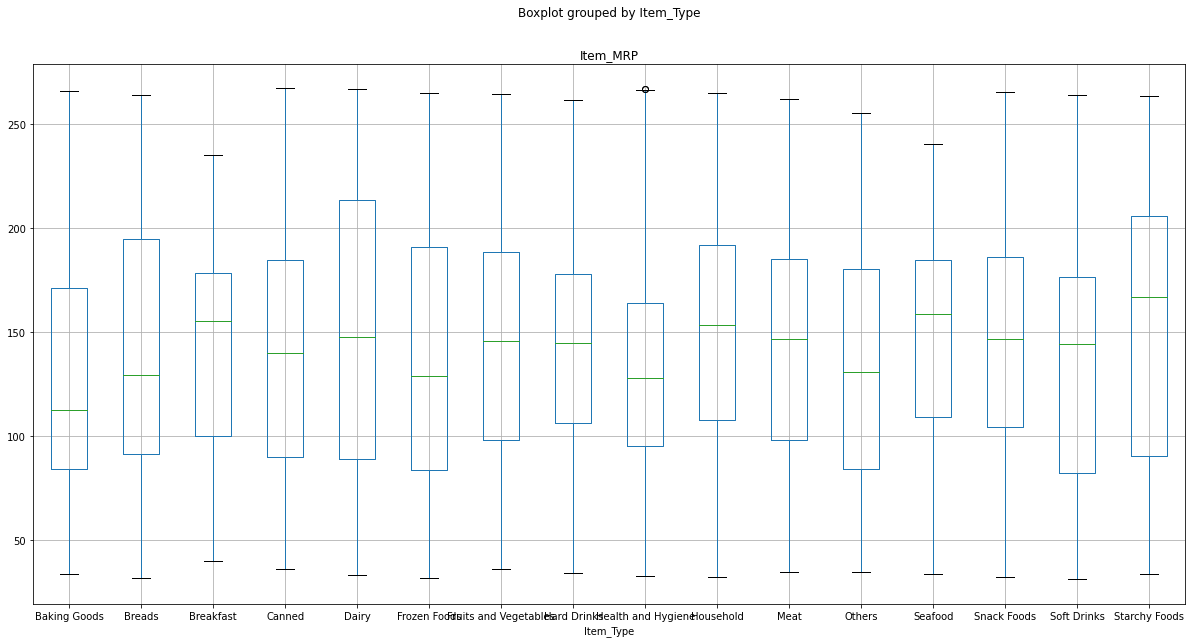

In [29]:
# data.boxplot(column="Outlet_Establishment_Year")
# data.boxplot(column="Item_Weight",by="Item_Type",figsize=(20,10))
data.boxplot(column="Item_MRP",by="Item_Type",figsize=(20,10))

Item_Visibility is an interesting property. It defines how prominently a product is displayed in a store, with higher values meaning it's in a front-row easily accessible to customers.<br>
We should check boxplot for the the Item_Visibility column

<AxesSubplot:>

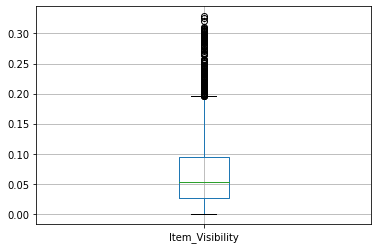

In [30]:
data.boxplot(column="Item_Visibility")

While it might seem like it has a lot of outliers above but this is simple because the range is so large.
Although it's another set of values that would cause issues when training a model.<br>
It should be made more apparent by a scatter plot:

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

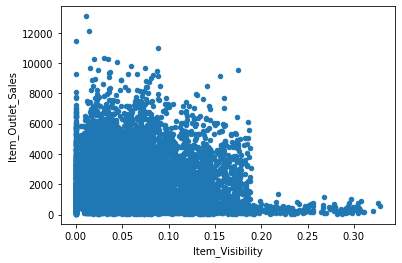

In [31]:
data.plot.scatter(x="Item_Visibility", y="Item_Outlet_Sales")

In the above plot we see Item_Visibility represented fine for the larger values but on the left end of the plot we see many values sticking to the corner,even in the boxplot, we can see that our minimum value is 0.<br>
Having a visibility of 0 means an items doesn't exist in the store. This is a major outlier. <br>
To fix this we replace all the 0's in the column with it's mean value 

In [32]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].mean())

Now checking the plot we see that it has a more uniform distribution

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

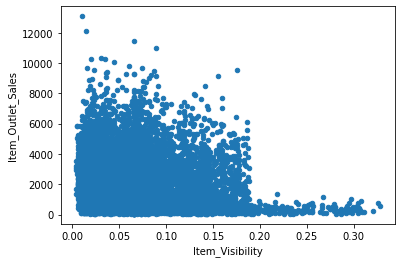

In [33]:
data.plot.scatter(x="Item_Visibility", y="Item_Outlet_Sales")

Now the this model is prepared to be trained for the task of outlet sales prediction!